Below is an example of a K-fold validation test. The idea is to split the data into folds used for testing and training. This will give a sense of how well our training error approximates the true prediction error

In [4]:
import numpy as np
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
Y_digits = digits.target

svc = svm.SVC(C=1,kernel='linear')

X_folds = np.array_split(X_digits,3)
Y_folds = np.array_split(Y_digits,3)
scores = []

for k in range(3):
    
    #Convert the split object to a list
    X_train = list(X_folds)
    #Remove the training dataset
    X_test = X_train.pop(k)
    #Concatinate the rest to make the test dataset
    X_train = np.concatenate(X_train)
    
    #Do the same for the Y dataset
    Y_train = list(Y_folds)
    Y_test = Y_train.pop(k)
    Y_train = np.concatenate(Y_train)
    scores.append(svc.fit(X_train,Y_train).score(X_test,Y_test))
    
print(scores) 
    

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


sklearn also has classes to do this automatically

In [12]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a","a","b","c","c","c","d","d","e","f","f","f","f"]

#Define the number of test/train splits we need
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(X):
    print ('Train %s | test: %s' %(train_indices, test_indices))

Train [ 2  3  4  5  6  7  8  9 10 11 12] | test: [0 1]
Train [ 0  1  4  5  6  7  8  9 10 11 12] | test: [2 3]
Train [ 0  1  2  3  6  7  8  9 10 11 12] | test: [4 5]
Train [ 0  1  2  3  4  5  7  8  9 10 11 12] | test: [6]
Train [ 0  1  2  3  4  5  6  8  9 10 11 12] | test: [7]
Train [ 0  1  2  3  4  5  6  7  9 10 11 12] | test: [8]
Train [ 0  1  2  3  4  5  6  7  8 10 11 12] | test: [9]
Train [ 0  1  2  3  4  5  6  7  8  9 11 12] | test: [10]
Train [ 0  1  2  3  4  5  6  7  8  9 10 12] | test: [11]
Train [ 0  1  2  3  4  5  6  7  8  9 10 11] | test: [12]


In [13]:
#This is a compact way of generating a list from a three split Kfold problem

[svc.fit(X_digits[train], Y_digits[train]).score(X_digits[test], Y_digits[test])\
 for train, test in k_fold.split(X_digits)]

[0.9388888888888889,
 0.9944444444444445,
 0.9333333333333333,
 0.9666666666666667,
 0.9611111111111111,
 0.9888888888888889,
 0.9666666666666667,
 0.9888268156424581,
 0.9329608938547486,
 0.9664804469273743]

In [15]:
#Yet another way to do this is as follows:
cross_val_score(svc,X_digits,Y_digits,cv=k_fold,scoring="precision_macro")

array([0.94423954, 0.99411765, 0.94752137, 0.97047619, 0.96459384,
       0.98918129, 0.96713352, 0.98947368, 0.93755025, 0.96780702])

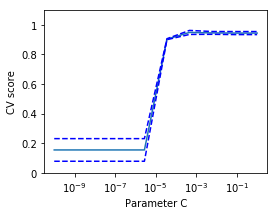

In [18]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    
    #This will use the default three-fold cross validation if we 
    #don't enter a value for cv here. Remember this because its a convenient way of
    #scoring the dataset
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    
    #Get the mean 
    scores.append(np.mean(this_scores))
    
    #Get the standard deviation
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

Note that the C paramter controls the smoothnes of the solution

We can also use this to extimate the best parameter sets from the cross validation scores. Again, there is an easy way to do this, but it doesn't really show you whats going on behind the scenes

In [26]:
from sklearn.model_selection import GridSearchCV, cross_val_score

Cs = np.logspace(-6, -1, 100)

#This is going to do a standard 3-Fold cross validation for each of the C values. Evidently
#we have to retrain the classifier each time so its quite an expensive 
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_digits[:1000], Y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 1.12332e-06, ..., 8.90215e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
clf.best_estimator_.C

0.007742636826811269

In [28]:
clf.best_score_

0.925